<h1 style="color:rgb(0,120,170)">Assignment 6: Logistic Regression</h1>

<h2 style="color:rgb(0,120,170)">Copyright and Fair Use</h2>

This material, no matter whether in printed or electronic form,
may be used for personal and non-commercial educational use
only. Any reproduction of this material, no matter whether as a
whole or in parts, no matter whether in printed or in electronic
form, requires explicit prior acceptance of the authors.

<h2 style="color:rgb(0,120,170)">Automatic Testing Guidelines</h2>

Automatic unittesting requires you to submit a notebook which contains strictly defined objects.
Strictness of definition consists of unified shapes, dtypes, variable names and more.

Within the notebook, we provide detailed instruction which you should follow in order to maximise your final grade.

**Name your notebook properly**, follow the pattern in the template name:

**Assignment_N_NameSurname_matrnumber**
<ol>
    <li>N - number of assignment</li>
    <li>NameSurname - your full name where every part of the name starts with a capital letter, no spaces</li>
    <li>matrnumber - you student number on ID card (with k, potentially with a leading zero)</li>
</ol>

Don't add any cells but use the ones provided by us. All cells have a unique ID so that the unit test can find it, so please do not add or remove any cell!

Always make sure that implemented functions have the correct output and given variables contain the correct data type. In the descriptions for every function you can find information on what datatype an output should have and you should stick to that in order to minimize conflicts with the unittest. Don't import any other packages than listed in the cell with the "imports" tag.

Questions are usually multiple choice (except the task description says otherwise) and can be answered by changing the given variables to either "True" or "False". "None" is counted as a wrong answer in any case!

**Note:** Never use variables you defined in another cell in your functions directly; always pass them to the function as a parameter. In the unitest, they won't be available either. If you want to make sure that everything is executable for the unittest, try executing cells/functions individually (instead of running the whole notebook).

In [65]:
# Nothing to do here, just run the cell.
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

RSEED = 44

<h2 style="color:rgb(0,120,170)">Task 1: Implementation of Logistic Regression</h2>

The goal of this exercise is to implement logistic regression from scratch using only numpy - do not import any new packages! 

Complete the following tasks:

* **Code 1.1**:
    * Implement a function `calc_loss(w, X, y)`, that takes a parameter vector `w`, a data matrix `X` and a binary label vector `y` and returns the binary cross-entropy loss: $$L_{BCE} = -\sum_{n = 1}^{N} \boldsymbol{y}^n \ln \left(\sigma(\boldsymbol{x}^n\cdot w)\right) + ({1 - \boldsymbol{y}^n}) \ln \left(1 - \sigma(\boldsymbol{x}^n\cdot w)\right)$$
* **Code 1.2**:
    * Implement the formula for the gradient computed in the lecture.
    * In particular you should implement a function `analytical_gradient(w, X, y)` that takes the same parameters as the function before but returns the gradient $\frac{\partial L}{\partial\mathbf{w}}$, where $L$ is the binary cross-entropy loss.
* **Code 1.3**:
    * Test whether the gradient calculated by `analytical_gradient(w, X, y)` is correct via Gradient Checking. To do so, implement the function `numerical_gradient(w, X, y, loss_fn, eps)` that takes the same parameters as `logistic_gradient` as well as a loss function and an additional optional parameter `eps` and computes: $$\operatorname{numerical gradient} = \frac{f(x + \epsilon) - f(x - \epsilon)}{2\epsilon}$$
* **Code 1.4**:
    * Implement the function `generate_random(N, K)` that generates a random data matrix consisting of `N` data points with `K` features drawn from a standard normal distribution as well as corresponding random binary labels and a random weight vector, whose entries again stem from the standard normal distribution.  Hint: to generate the distributions use `np.random.normal` and `np.random.randint`.
* **Question 1.5**:
    * Answer some questions about your results from the previous exercies.
* **Question 1.6**:
    * Answer some questions about the missing bias term.

<h3 style="color:rgb(210,90,80)">Code 1.1 (5 Points):</h3>

In [66]:
def calc_loss(w: np.ndarray, X: np.ndarray, y: np.ndarray) -> float:
    """Function that computes the cross-entropy loss.
    
    Parameters
    ----------
    w : (K,) np.ndarray
        Weight vector.
    X : (N, K) np.ndarray
        Data matrix.
    y : (N,) np.ndarray
        Label vector.

    Returns
    -------
    float
        The cross-entropy loss.
    """
    # YOUR CODE HERE
    # Compute the logits
    z = X @ w
    # Compute the sigmoid
    p = 1 / (1 + np.exp(-z))
    # Compute the loss
    # Add a small epsilon to the log to avoid log(0)
    eps = 1e-15
    loss = -np.sum(y * np.log(p + eps) + (1 - y) * np.log(1 - p + eps))
    return float(loss)

In [67]:
# DO NOT DELETE THIS CELL!
N, K = 20, 5
w_testing = np.linspace(-3, 1, K)
X_testing = np.linspace(-2, 2, N*K).reshape(N, K)
y_testing = np.zeros(N)
y_testing[[2, 5, 7, 8, 9, 14]] = 1

loss = calc_loss(w_testing, X_testing, y_testing)
assert isinstance(loss, float), "The resulting loss is not a float!"
assert np.isclose(loss, 41.6671, atol=1e-4), "The loss is incorrect!"

<h3 style="color:rgb(210,90,80)">Code 1.2 (5 Points):</h3>

In [68]:
def analytical_gradient(w: np.ndarray, X: np.ndarray, y: np.ndarray) -> np.ndarray:
    """Function that computes the logistic gradient via the cross-entropy loss.

    Parameters
    ----------
    w : (K,) np.ndarray
        Weight vector.
    X : (N, K) np.ndarray
        Data matrix.
    y : (N,) np.ndarray
        Label vector.

    Returns
    -------
    gradient : (K,) np.ndarray
        Gradient vector.
    """
    # YOUR CODE HERE
    z = X @ w
    p = 1 / (1 + np.exp(-z))
    grad = X.T @ (p - y)
    return grad

In [69]:
# DO NOT DELETE THIS CELL!
analytical_grad = analytical_gradient(w_testing, X_testing, y_testing)
assert isinstance(analytical_grad, np.ndarray), "The gradient is not a np.ndarray!"
np.testing.assert_array_almost_equal(analytical_grad, np.array([-7.6822332 , -7.50445673, -7.32668026, -7.14890379, -6.97112732]), decimal=4)

<h3 style="color:rgb(210,90,80)">Code 1.3 (14 Points):</h3>

In [70]:
def numerical_gradient(w: np.ndarray, X: np.ndarray, y: np.ndarray, loss_fn: callable, eps: float = 1e-7) -> np.ndarray:
    """Function that computes the numerical gradient for each epsilon in eps_list.
    Hint: use the previously implemented cost function. 

    Parameters
    ----------
    w : (K,) np.ndarray
        Weight vector.
    X : (N, K) np.ndarray
        Data matrix.
    y : (N,) np.ndarray
        Label vector.
    loss_fn: callable
        Loss function that calculates the cross-entropy loss.
    eps : float = 1e-7
        The epsilon value for the difference quotient calculation.

    Returns
    -------
    gradient : (K,) np.ndarray
        The numerical gradient approximating the analytical one.
    """
    # YOUR CODE HERE
    grad = np.zeros_like(w)
    for i in range(len(w)):
        w_up = w.copy()
        w_down = w.copy()
        w_up[i] += eps
        w_down[i] -= eps
        
        f_up = loss_fn(w_up, X, y)
        f_down = loss_fn(w_down, X, y)
        
        grad[i] = (f_up - f_down) / (2 * eps)
    return grad

In [71]:
# DO NOT DELETE THIS CELL!
numerical_grad = numerical_gradient(w_testing, X_testing, y_testing, lambda x, y, z: np.sum(np.tanh(x)))

assert isinstance(numerical_grad, np.ndarray), "The numerical gradient is not a np.ndarray!"
np.testing.assert_array_almost_equal(numerical_grad, np.array([0.00986604, 0.07065083, 0.41997434, 1., 0.41997434]), decimal=4)

<h3 style="color:rgb(210,90,80)">Code 1.4 (10 Points):</h3>

In [72]:
def generate_random(N: int, K: int) -> tuple[np.ndarray, np.ndarray, np.ndarray]:
    """Function that generates a random data matrix X and the random binary labels vectorsy as well as weights according to input specifications.
    
    Important: To generate the distributions use numpy's np.random.<...> functions.

    Parameters
    ----------
    N : int,
        Number of samples to generate.
    K : int,
        number of features of each sample.
        
    Returns
    -------
    tuple of np.ndarray
        - X_random : (N, K) np.ndarray
            The generated data matrix.
        - y_random : (N,) np.ndarray
            The generated binary labels vector.
        - w_random : (K,) np.ndarray
            The generated weights.
    """
    # YOUR CODE HERE
    X_random = np.random.normal(loc=0.0, scale=1.0, size=(N, K))
    y_random = np.random.randint(0, 2, size=N)
    w_random = np.random.normal(loc=0.0, scale=1.0, size=K)
    return X_random, y_random, w_random

In [73]:
# DO NOT DELETE THIS CELL!
np.random.seed(RSEED)
X_random, y_random, w_random = generate_random(5, 10)

assert isinstance(X_random, np.ndarray) and isinstance(y_random, np.ndarray) and isinstance(w_random, np.ndarray), "One of the results is not a np.ndarray!"
assert X_random.shape == (5, 10) and y_random.shape == (5,) and w_random.shape == (10,), "At least one of the resulting arrays has a wrong shape!"
assert np.all(np.isin(y_random, [0, 1])), "The generated labels vector has invalid values!"

In [74]:
# Nothing to do here, just run the cell.
np.random.seed(RSEED)
N = 5
K = 10
eps_list = [1e-1, 1e-4, 1e-11]
X_random, y_random, w_random = generate_random(N, K)
analytical_grad = analytical_gradient(w_random, X_random, y_random)
numerical_grads = []
for eps in eps_list:
    numerical_grads.append(numerical_gradient(w_random, X_random, y_random, calc_loss, eps))
    
comparison_results=[np.allclose(analytical_grad, numerical_grad, atol=1e-7) for numerical_grad in numerical_grads]
# Check outputs
assert len(comparison_results) == len(eps_list), "List with comparison results should be the same length as there are epsilon values."
assert isinstance(comparison_results[0],bool), f"Comparison results should be list of booleans."
print("Your randomly generated data:\n")
print("X =",X_random,"\n")
print("y =",y_random,"\n")
print("w = ",w_random,"\n")
print("Logistic gradient:\n",analytical_grad,"\n")
for i, res in enumerate(comparison_results):
    eps_ = eps_list[i]
    print(70*"=")
    print(f"Numerical gradient {i} with epsilon = {eps_}:\n", numerical_grads[i], "\n")
    print("Vectors within absolute tolerance of 10^-7: ", res, "\n")

Your randomly generated data:

X = [[-0.75061472  1.31635732  1.24614003 -1.60491574 -1.46814368 -1.71507046
   1.85878369  0.08758798 -0.0523222   0.55547164]
 [-0.96340369 -0.18032147 -1.18340916  0.60544592 -0.95165055  0.36085606
   1.06061026 -0.11715218  0.82566485 -1.20981355]
 [-1.19050362  0.21987182 -0.21291913 -1.41149914 -0.48298102  1.20176208
  -0.70580303  0.02518135 -0.39112815  0.19313912]
 [ 0.34929093  0.59118838  0.52040987  0.82522239  0.42620351  0.19564003
  -0.51411218 -3.07368882 -0.39515907 -0.79539918]
 [-0.70320151 -1.73739268  0.75080826 -1.86395314  0.41851098 -0.23533384
   0.43210717  0.87029193  2.00862219  1.37177091]] 

y = [1 1 0 1 0] 

w =  [-0.78250832 -0.68105798  0.76098988  0.62483292 -0.45678902 -0.33331661
  0.55805765  1.39253236  0.44025472 -1.24948056] 

Logistic gradient:
 [-0.99891843 -2.25379004 -0.13244644 -2.38498447  0.17958543  0.23018978
  0.26027996  3.72772198  1.95281213  1.91449719] 

Numerical gradient 0 with epsilon = 0.1:
 [-

<h3 style="color:rgb(210,90,80)">Question 1.5 (3 Points):</h3>

Q: Following the results from your comparison function, if at all, why do you think is the right choice of $\epsilon$ crucial, for computing adequate approximations with the numerical gradient function?

a1_) The choice does not matter, as long as epsilon is in (0,1) the function will give a satisfying solution, according to our tolerance criterion.<br>
b1_) Very large values for $\epsilon$, e.g. $\epsilon=0.1$, lead to a divergence of the gradient as the denominator approaches zero. <br>
c1_) Very small values for $\epsilon$, e.g. $\epsilon \leq \text{1e-11}$, can result in calculation errors, this could be due to issues with numerical precision, as both values in the numerator as well as in the denominator are very small.<br>

To answer the question, assign `True` or `False` boolean values to variables in the next cell. For example, if you think that **a1_)** is correct, define a variable `a1_` and set it to `True`, the same applies to **b1_)** and the other options. A non-correctly answered question as well as no answer (i.e. answer “None”) yields 0 points for a specific question.<br>

In [75]:
# YOUR CODE HERE
a1_ = False
b1_ = False
c1_ = True

In [76]:
# DO NOT DELETE THIS CELL!
assert a1_ is not None, "Store True/False!"
assert a1_ in [True, False], "Invalid Answer!"

In [77]:
# DO NOT DELETE THIS CELL!
assert b1_ is not None, "Store True/False!"
assert b1_ in [True, False], "Invalid Answer!"

In [78]:
# DO NOT DELETE THIS CELL!
assert c1_ is not None, "Store True/False!"
assert c1_ in [True, False], "Invalid Answer!"

<h3 style="color:rgb(210,90,80)">Question 1.6 (3 Points):</h3>

Q: Did you notice that we left out the bias term in our implementation of the logistic regression? (In the lecture Unit 5, Slide 45/47 shows the logistic unit with bias.) The bias $b$ represents the log-odds of the probability that the dependent variable takes on the value of 1 when all independent variables are set to zero.

Why was it okay to not use a bias for our data? 

d1_) The bias term cancels out when calculating the derivative of the loss-function, because it does not depend on $\mathbf{X}$.<br>
e1_) The bias is only relevant when all independent variables are exactly 0, which never actually happens in real data.<br>
f1_) The data follows a standard normal distribution, hence a bias of 0 leads to the correct predictions, based on the condition that the label distribution is symmetric. <br>

To answer the question, assign `True` or `False` boolean values to variables in the next cell. For example, if you think that **d1_)** is correct, define a variable `d1_` and set it to `True`, the same applies to **e1_)** and the other options. A non-correctly answered question as well as no answer (i.e. answer “None”) yields 0 points for a specific question.<br>

In [79]:
# YOUR CODE HERE
d1_ = False
e1_ = False 
f1_ = True

In [80]:
# DO NOT DELETE THIS CELL!
assert d1_ is not None, "Store True/False!"
assert d1_ in [True, False], "Invalid Answer!"

In [81]:
# DO NOT DELETE THIS CELL!
assert e1_ is not None, "Store True/False!"
assert e1_ in [True, False], "Invalid Answer!"

In [82]:
# DO NOT DELETE THIS CELL!
assert f1_ is not None, "Store True/False!"
assert f1_ in [True, False], "Invalid Answer!"

<h2 style="color:rgb(0,120,170)">Task 2: Logistic Regression on a real dataset</h2>

Next we intend to apply logistic regression on a real data set. Firstly, in the following cell the data set `DataSet_LR_a.csv` is loaded and split into a training set and a test set ($50\,\%$ each). Also a constant feature (all ones) is added to X such that we can train an additional weight for the intercept which is the same for all datapoints. We visualize the dataset and then you should do the following:

* **Code 2.1**:
    * Implement a function `fit_Log_Reg_Model(...)` that uses Logistic Regression with Gradient Descent to train classifiers on the training set.
    * Use randomly initialized weights, drawn from a uniform distribution between $-1$ and $1$ (have a look at `np.random.unifrom`), a default learning rate `eta` and a maximum number of iterations `max_iter`.
    * Furthermore the algorithm should stop either if the difference between the loss of the last iteration step and the current loss is less than the `stopping_criterion` or the maximum of allowed iterations `max_iter` is reached (in this case print that the maximum iteration was reached).
    * Also print the losses in $10000$ step intervals (also at step 0!). The function should return the fitted model weights.
* **Code 2.2**:
    * Furthermore, implement a function `predict_Log_Reg(w, X_test)` that returns the prediction for the given parameter vector $\mathbf{w}$ and data matrix $\mathbf{X_test}$.
* **Question 2.3**:
    * Answer some questions about your results.
* **Code 2.4**:
    * Implement the function `calc_metrics(prediction, targets, threshold)` that computes the Accuracy and Balanced Accuracy. To do so, you should  classify samples as class `1` if the Logistic Regression returns values $\geq$`threshold` and `0` otherwise.
* **Plot 2.5**:
    * Plot the ROC curve of the classifiers on the test samples and compute and display the corresponding AUC. Hint: the functions `roc_curve` and `auc` from `sklearn.metrics` might be useful.

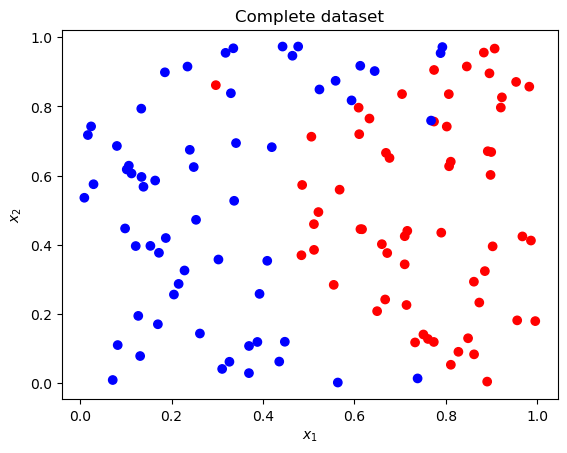

In [83]:
# Nothing to do here, just run the cell.
# Read data, split into X(features) and y(labels)
Z = np.genfromtxt('DataSet_LR_a.csv', delimiter=',',skip_header=1)
X, y = Z[:,:-1], Z[:,-1]
# Prepend ones for intercept
X = np.hstack((np.ones((X.shape[0],1)),X))   

# Plot data distribution
color= ['red' if elem==1 else 'blue' for elem in y ]
plt.scatter(X[:,-2], X[:,-1], c=color)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Complete dataset')

# Split into test and training set
X_train=X[:int(X.shape[0]/2)]
X_test=X[int(X.shape[0]/2):]
y_train=y[:int(len(y)/2)]
y_test=y[int(len(y)/2):]

<h3 style="color:rgb(208,90,80)">Code 2.1 (20 Points)</h3>


In [84]:
def fit_Log_Reg_Model(
    X_train: np.ndarray,
    y_train: np.ndarray,
    loss_fn: callable,
    grad_fn: callable, 
    eta: float = 1e-4,
    stopping_criterion: float = 1e-5,
    max_iter: float = 1e5
) -> np.ndarray:
    """Function that fits a logistic regression model to the given data. 
    Prints the loss every 10000 steps (also in the beginning at step 0).
    Training stops if either the change of the current loss to the loss of the previous iteration is smaller than the stopping_criterion, or max_iter is reached.
    
    Important: Make sure to initialize the weights-vector from a random uniform distribution with np.random.uniform and with the correct dimensions according to X_train.

    Parameters
    ----------
    X_train : (N, K) np.ndarray
        Data matrix.
    y_train : (N,) np.ndarray
        Label vector.
    loss_fn: callable
        Loss function that calculates the binary cross-entropy loss.
    grad_fn: callable
        Function that calculates the analytical gradient.
    eta : float
        Learning rate for gradient descent.
    stopping_criterion : float
        Stopping criterion for the training process.
    max_iter : int, optional
        Max iteration at which training should stop, by default 100000.

    Returns
    -------
    weights : np.ndarray
        The fitted weights.
    """
    # YOUR CODE HERE
    # Initialize weights uniformly in [-1,1]
    w = np.random.uniform(-1, 1, size=X_train.shape[1])
    
    # Compute initial loss
    old_loss = loss_fn(w, X_train, y_train)
    if max_iter < 1:
        max_iter = 1  # Safety check if max_iter was given as float but less than 1
    
    for i in range(int(max_iter)):
        # Compute gradient
        grad = grad_fn(w, X_train, y_train)
        
        # Update weights
        w -= eta * grad
        
        # Compute new loss
        new_loss = loss_fn(w, X_train, y_train)
        
        # Print losses every 10000 steps (and at step 0)
        if i % 10000 == 0:
            print(f"Iteration {i}: Loss = {new_loss:.6f}")
        
        # Check stopping criterion
        if abs(old_loss - new_loss) < stopping_criterion:
            break
        
        old_loss = new_loss
    else:
        # If the loop completes without break, max_iter reached
        print("Maximum number of iterations reached!")
        
    return w

In [85]:
# DO NOT DELETE THIS CELL!
np.random.seed(RSEED)

w_learned = fit_Log_Reg_Model(X_train, y_train, calc_loss, analytical_gradient, eta=1e-4)
print("The learnt weights are: w =", w_learned, "\n")
assert isinstance(w_learned, np.ndarray), "The resulting weights are not a np.ndarray!"
assert w_learned.shape == (X_train.shape[1],), "The resulting weights have a wrong shape!"
np.testing.assert_almost_equal(w_learned, np.array([-3.26516093,  8.25477584, -1.49905643]), decimal=4)

Iteration 0: Loss = 47.654378
Iteration 10000: Loss = 25.564029
Iteration 20000: Loss = 21.286213
Iteration 30000: Loss = 19.760174
Iteration 40000: Loss = 19.049649
Iteration 50000: Loss = 18.669119
Iteration 60000: Loss = 18.447133
Iteration 70000: Loss = 18.310026
The learnt weights are: w = [-3.26516093  8.25477584 -1.49905643] 



<h3 style="color:rgb(208,90,80)">Code 2.2 (5 Points)</h3>


In [86]:
def predict_Log_Reg(w: np.ndarray, X_test: np.ndarray) -> np.ndarray:
    """Function that calculates the prediction for one or more new and unseen samples, from the trained weights. 
    
    Do not use any packages for this task except numpy.

    Parameters
    ----------
    w : (K,) np.ndarray
        Vector of trained weights.
    X_test : (N, K) np.ndarray
        Samples to make predictions for.

    Returns
    -------
    prediction : (N,) np.ndarray
        Vector of calculated predictions, floats between 0 and 1
    """
    # YOUR CODE HERE
    z = X_test @ w
    p = 1 / (1 + np.exp(-z))
    return p

In [87]:
# DO NOT DELETE THIS CELL!
pred = predict_Log_Reg(np.linspace(-5, 5, X_train.shape[1]), X_train[:5])
assert isinstance(pred, np.ndarray), "The predictions are not a np.ndarray!"
assert np.all(pred >=0) and np.all(pred <= 1), "The predictions should be in the range [0, 1]!"
np.testing.assert_array_almost_equal(pred, np.array([0.05192384, 0.00680571, 0.466878  , 0.03788321, 0.26271971]), decimal=4)

Now we fit the logistic regression model to the training data with different learning rates and print the parameters for the test data. In case you want, you can try out different learning rates (just change the `eta_list`).

In [88]:
# Fit the model on the training data with different learning rates.
pred_train = []
pred_test = []
eta_list = [1e-7, 1e-4, 6e-1]

for lr in eta_list:
    np.random.seed(RSEED)
    w_learned = fit_Log_Reg_Model(X_train, y_train, calc_loss, analytical_gradient, eta=lr)
    pred_train.append(predict_Log_Reg(w_learned, X_train))
    pred_test.append(predict_Log_Reg(w_learned, X_test))
    print("The learnt weights are: w =", w_learned, "\n")

Iteration 0: Loss = 47.659800
The learnt weights are: w = [ 0.66968399 -0.79040721  0.48928063] 

Iteration 0: Loss = 47.654378
Iteration 10000: Loss = 25.564029
Iteration 20000: Loss = 21.286213
Iteration 30000: Loss = 19.760174
Iteration 40000: Loss = 19.049649
Iteration 50000: Loss = 18.669119
Iteration 60000: Loss = 18.447133
Iteration 70000: Loss = 18.310026
The learnt weights are: w = [-3.26516093  8.25477584 -1.49905643] 

Iteration 0: Loss = 31.125544
Iteration 10000: Loss = 30.192031
Iteration 20000: Loss = 32.102522
Iteration 30000: Loss = 42.503381
Iteration 40000: Loss = 35.796859
Iteration 50000: Loss = 30.428015
Iteration 60000: Loss = 35.723191
Iteration 70000: Loss = 53.111087
Iteration 80000: Loss = 30.156895
Iteration 90000: Loss = 32.568933
Maximum number of iterations reached!
The learnt weights are: w = [-6.17209681 24.80854336 -1.16601192] 



Let's visualize your results!

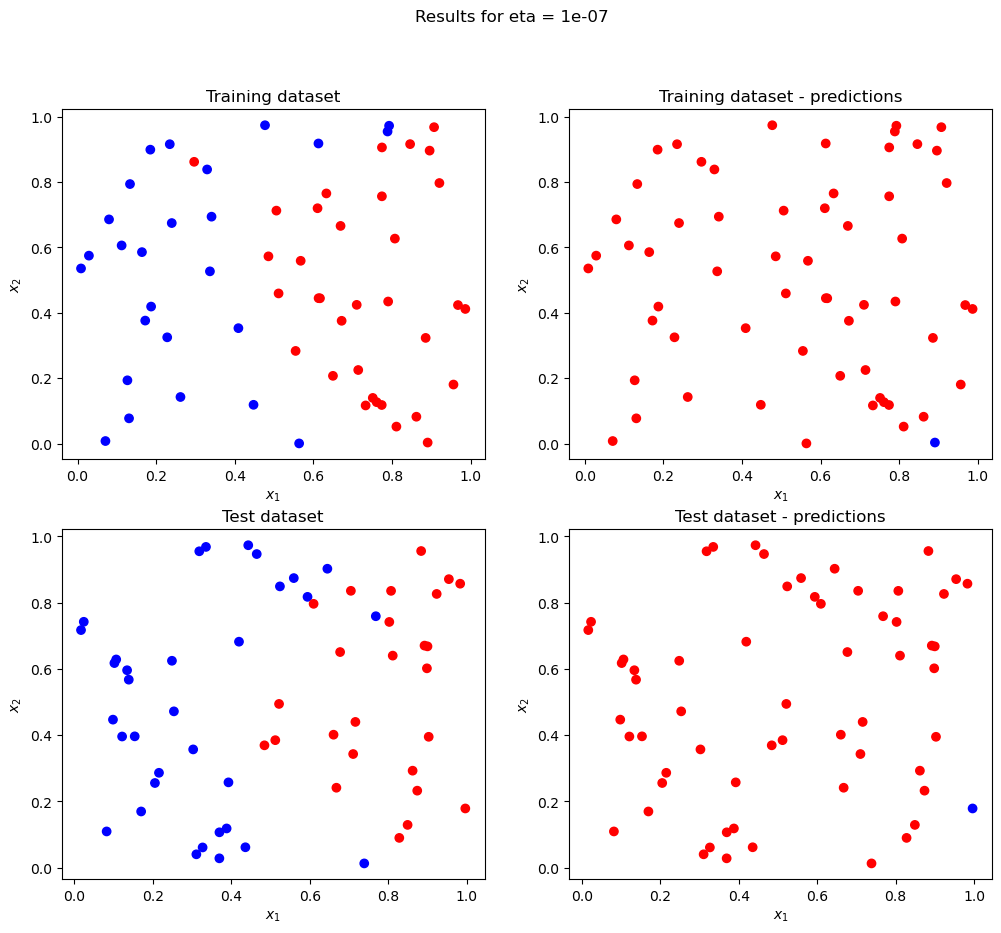

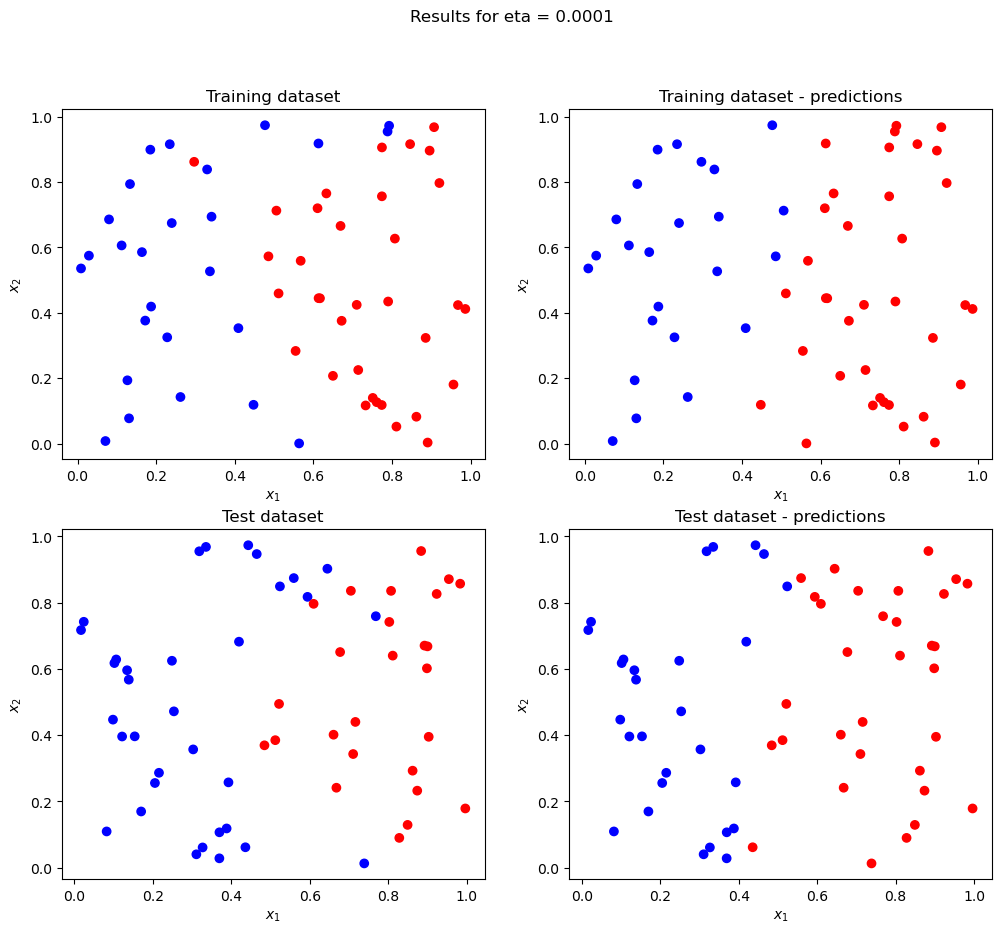

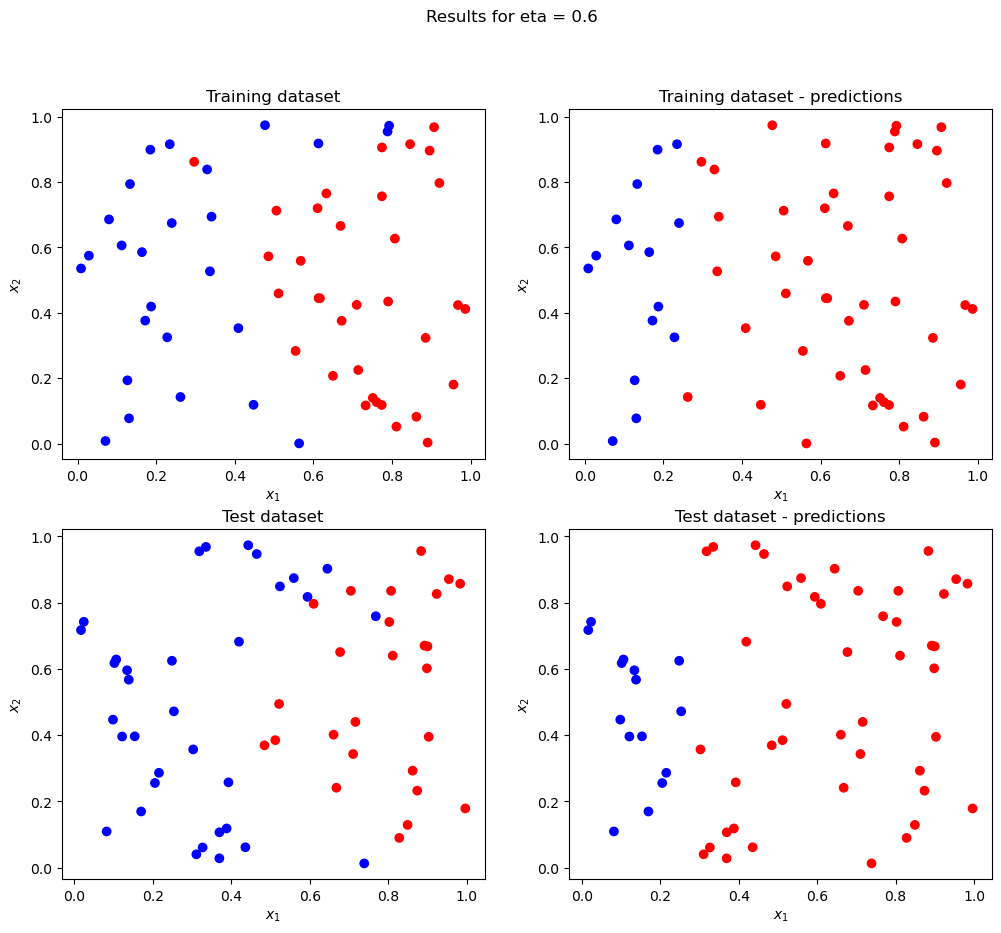

In [89]:
# Nothing to do here, just run the cell.
# Plot training and test dataset as well as the predictions for both
for i, _ in enumerate(pred_train):
    fig = plt.figure(figsize = (12,10))
    fig.suptitle(f"Results for eta = {eta_list[i]}")
    plt.subplot(2, 2, 1)
    color= ['red' if elem>0.5 else 'blue' for elem in y_train ]
    plt.scatter(X_train[:,-2], X_train[:,-1], c=color,label='the data')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.title('Training dataset')

    plt.subplot(2, 2, 2)
    color= ['red' if elem>0.5 else 'blue' for elem in pred_train[i] ]
    plt.scatter(X_train[:,-2], X_train[:,-1], c=color,label='the data')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.title('Training dataset - predictions')

    plt.subplot(2, 2, 3)
    color= ['red' if elem>0.5 else 'blue' for elem in y_test ]
    plt.scatter(X_test[:,-2], X_test[:,-1], c=color, label='the data')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.title('Test dataset')

    plt.subplot(2, 2, 4)
    color= ['red' if elem>0.5 else 'blue' for elem in pred_test[i] ]
    plt.scatter(X_test[:,-2], X_test[:,-1], c=color, label='the data')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.title('Test dataset - predictions')

<h3 style="color:rgb(210,90,80)">Question 2.3 (5 Points):</h3>

Q: Following your experiments with the the learning rate (eta), which of the following statements are correct?

a2_) Learning rates > 0.5 lead to fast convergence (i.e. our default `stopping_criterion` was met) and reasonably good predictions on the test data.<br>
b2_) For learning rates smaller than 1e-6 the algorithm does not stop with the default `stopping_criterion` before `max_iter` is reached. <br>
c2_) When inspecting the plot for the default learning rate 1e-4, we see that also the outliers are classified correctly.<br>
d2_) No matter what learning rate we choose from (0,1), if the algorithm converges, in the sense that it stops with the `stopping_criterion`, the resulting weights are always the same (within a small tolerance of $\sim|0.1|$)<br>
e2_) If we trained the classifier for a very long time, with the optimal learning rate, the resulting model would separate the training data perfectly (accuracy = 1), but it would perform much worse on the test data (overfitting).<br>

To answer the question, assign `True` or `False` boolean values to variables in the next cell. For example, if you think that **a2_)** is correct, define a variable `a2_` and set it to `True`, the same applies to **b2_)** and the other options. A non-correctly answered question as well as no answer (i.e. answer “None”) yields 0 points for a specific question.<br>

In [90]:
# YOUR CODE HERE
a2_ = False
b2_ = True
c2_ = False
d2_ = True
e2_ = True

In [91]:
# DO NOT DELETE THIS CELL!
assert a2_ is not None, "Store True/False!"
assert a2_ in [True, False], "Invalid Answer!"

In [92]:
# DO NOT DELETE THIS CELL!
assert b2_ is not None, "Store True/False!"
assert b2_ in [True, False], "Invalid Answer!"

In [93]:
# DO NOT DELETE THIS CELL!
assert c2_ is not None, "Store True/False!"
assert c2_ in [True, False], "Invalid Answer!"

In [94]:
# DO NOT DELETE THIS CELL!
assert d2_ is not None, "Store True/False!"
assert d2_ in [True, False], "Invalid Answer!"

In [95]:
# DO NOT DELETE THIS CELL!
assert e2_ is not None, "Store True/False!"
assert e2_ in [True, False], "Invalid Answer!"

<h3 style="color:rgb(208,90,80)">Code 2.4 (15 Points)</h3>

In [96]:
def calc_metrics(predictions: np.ndarray, targets: np.ndarray, threshold: float = 0.5) -> tuple[float, float]:
    """Function that calculates the accuracy as well as the balanced accuracy of the predictions vs. true labels.
    
    Again, only us numpy for this task.
    
    Parameters
    ----------
    predictions : np.ndarray
        The computed predictions between 0 and 1.
    targets : np.ndarray
        The true binary targets.
    threshold : float, optional
        Threshold for the label decision, by default 0.5.

    Returns
    -------
    tuple of float
        acc : float 
            The calculated accuracy.
        balanced_acc :  float
            The calculated balanced accuracy.
    """
    # YOUR CODE HERE
    # Convert predictions to binary decisions
    pred_binary = (predictions >= threshold).astype(int)
    
    # Accuracy = (TP+TN)/(TP+TN+FP+FN)
    acc = np.mean(pred_binary == targets)
    
    # Balanced accuracy = 0.5*(TPR + TNR)
    # TPR = TP/(TP+FN), TNR = TN/(TN+FP)
    # Get confusion matrix elements
    TP = np.sum((pred_binary == 1) & (targets == 1))
    TN = np.sum((pred_binary == 0) & (targets == 0))
    FP = np.sum((pred_binary == 1) & (targets == 0))
    FN = np.sum((pred_binary == 0) & (targets == 1))
    
    # Avoid division by zero
    TPR = TP / (TP + FN) if (TP+FN) > 0 else 0
    TNR = TN / (TN + FP) if (TN+FP) > 0 else 0
    
    bacc = 0.5 * (TPR + TNR)
    
    return acc, bacc

In [97]:
# DO NOT DELETE THIS CELL!
acc, bacc = calc_metrics(np.linspace(0, 1, len(y_train)), y_train)
assert isinstance(acc, float), "The accuracy is not a float!"
assert np.isclose(acc, 0.5667, atol=1e-4), "The accuracy is not correct!"

In [98]:
# DO NOT DELETE THIS CELL!
assert isinstance(bacc, float), "The balanced accuracy is not a float!"
assert np.isclose(bacc, 0.5679, atol=1e-4), "The balanced accuracy is not correct!"

In [99]:
# Nothing to do here, just run the cell.
# Calculate metrics for both the train and test set
np.random.seed(RSEED)
w_learned = fit_Log_Reg_Model(X_train, y_train, calc_loss, analytical_gradient, eta=1e-4)
pred_train = predict_Log_Reg(w_learned, X_train)
pred_test = predict_Log_Reg(w_learned, X_test)

result_train = calc_metrics(pred_train, y_train)
result_test = calc_metrics(pred_test, y_test)
print("\nAccuracy on training data:", result_train[-2])
print("Balanced accuracy on training data:", result_train[-1])
print("Accuracy on test data:", result_test[-2])
print("Balanced accuracy on test data:", result_test[-1])

Iteration 0: Loss = 47.654378
Iteration 10000: Loss = 25.564029
Iteration 20000: Loss = 21.286213
Iteration 30000: Loss = 19.760174
Iteration 40000: Loss = 19.049649
Iteration 50000: Loss = 18.669119
Iteration 60000: Loss = 18.447133
Iteration 70000: Loss = 18.310026

Accuracy on training data: 0.8666666666666667
Balanced accuracy on training data: 0.8597285067873304
Accuracy on test data: 0.9
Balanced accuracy on test data: 0.9117647058823529


<h3 style="color:rgb(208,90,80)">Plot 2.5 (15 Points)</h3>


In [100]:
def roc_auc(y_test: np.ndarray, y_pred: np.ndarray):
    """Function that computes the AUC of the input predictions vs the true labels and plots the ROC curve as well as displays the AUC in the plot.
    
    You are only allowed to use the imported sklearn functions.
    
    Parameters
    ----------
    y_test : np.ndarray
        True labels of test data.
    y_pred : np.ndarray
        Predictions of test labels.
    """    
    # YOUR CODE HERE
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    the_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC curve (AUC = {the_auc:.3f})")
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic")
    plt.legend(loc="lower right")
    plt.show()

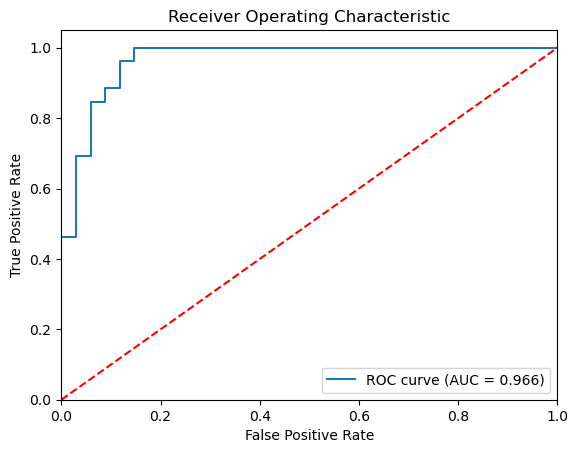

In [101]:
# Nothing to do here, just run the cell.
roc_auc(y_test, pred_test)